# Montecarlo & Portfolio Construction

This is basically just Jared's code with a few changes. There are a few things to note that I need to look at

- A few percentage returns appear to be infinite, and one has 60% daily. I haven't figured out why yet but i have removed the infinite ones. The company posting a 60% average daily growth remains in for now. 
- the tradable stocks needs to be changed, one more file will be added. I want to check with Charmaine to ensure that this has been done right as I worry my filtering has removed too many companies. 
- One of the files, namely 2021.xlsx had the ticker column named "Ticker" so in my local copy I have changed that to "ticker" to match the others. I didn't change the dropbox incase other peoples code was running from it.
- for now assumed risk free interest rate is just a constant, which was from Jared's file but I think this value is not the real value yet. 


I think I need to also include the largest negative returns, I haven't done this yet!! should just mean basically changing one line but right now basically "good portfolios" that give high returns are only the ones that have increase in price, it doesn't consider selling or shorting a stock. I.e. change the way returns are calculated 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Getting Tradable Stocks

This is based on the four files, we still need the last one. I am not sure this is right as it only contains ~5,000 companies, which is a lot less than the ~55,000 we were dealing with initially.

In [2]:
mappings = pd.read_excel('mappings.xlsx', index_col=0)  

files = ['old_bbg_tradable_check_AH_121721_final.xlsx','old_bbg_different_no_new_tradable_check_AH_121721_final.xlsx',
         'blank_bbg_tradable_check_AH_121721_final.xlsx','new_bbg_tradable_check_AH_121721_final.xlsx']
tradable_companies = []

for i in files:
    xls = pd.ExcelFile(i)
    tradable = pd.read_excel(xls, 'Tradable')
    tradable = tradable.reset_index()
    keep = tradable['Ticker'].unique()

    for j in keep:
        tradable_companies.append(mappings[mappings[' bbg_ticker'] == j])
    
tradable_companies = pd.concat(tradable_companies)
tradable_companies = tradable_companies.reset_index()


#Some stocks appear twice, i.e. maybe they are valid on two exchanges? This removes the duplicates.
tradable_companies = tradable_companies.drop_duplicates(keep=False)


#writer = pd.ExcelWriter('tradable_companies.xlsx', engine='xlsxwriter')
#tradable_companies.to_excel(writer, sheet_name='Tradable')
#writer.save()

### Collating historical price information for tradable stocks


In [3]:
years = [2017,2018,2019,2020,2021]
tradables = tradable_companies['fsym_id'].unique()


#this gets all the price files, i.e. 2017 -> 2021 and puts them in a list of dataframes 
prices = []
for i in range (0,len(years)):
    prices.append(pd.read_csv('Prices/' + str(years[i]) + '.csv', skiprows = 4).set_index('ticker'))
    prices[i] = prices[i].reset_index()
    prices[i]= prices[i][prices[i]['ticker'].isin(list(set(tradables)))]


#puts into one big dataframe, drops missing values & formats
prices = pd.concat(prices, axis=1)
prices = prices.dropna()
prices = prices.set_index('ticker')
prices = prices.T

#correctly names the columns. Before it was a list like (AAPL,AAPL,AAPL,AAPL) this makes it just (AAPL). 
ticker_list = []
for i in range (0,len(prices.columns)):
    ticker_list.append(prices.columns[i][1])
    
#finalizes the price dataframe
prices = prices.set_axis(ticker_list, axis=1, inplace=False)

In [4]:
companies = []
mappings = mappings.reset_index()
for j in prices.columns:
        companies.append(mappings[mappings['fsym_id'] == j])

In [5]:
companies2 = pd.concat(companies)
companies2

,fsym_id,ticker,bbg_ticker,entity_id,company_name,country_hq,country_name,exchange_name,currency,market,Layer 1,Layer 3,parent_equity,parent_fsym_id,parent_ticker
1,DWS9D2-R,000002-CN,000002 CH,05HYYD-E,"China Vanke Co., Ltd Class A",China,CHINA,Shenzhen,CNY,Asia,Real_Estate,Real Estate Investment and Services,BN320P,NGWSTS-R,2202-HK
9,WX9DSB-R,000011-CN,000011 CH,05HZSR-E,Shenzhen Properties & Resources Development (G...,China,CHINA,Shenzhen,CNY,Asia,Real_Estate,Real Estate Investment and Services,680359,DVSJQ6-R,200011-CN
10,B7188V-R,000012-CN,000012 CH,05HXQF-E,"CSG Holding Co., Ltd. Class A",China,CHINA,Shenzhen,CNY,Asia,Materials,Construction Materials,619617,D0NZQG-R,200012-CN
12,DXXJL4-R,000016-CN,000016 CH,05HZQP-E,"Konka Group Co., Ltd. Class A",China,CHINA,Shenzhen,CNY,Asia,Information_Technology,Information Technology Distribution,680325,CKV5X1-R,200016-CN
13,JR033H-R,000017-CN,000017 CH,05J13C-E,"Shenzhen China Bicycle Company (Holdings) Co.,...",China,CHINA,Shenzhen,CNY,Asia,Consumer_Discretionary,Leisure Goods Products,680368,QKNY5R-R,200017-CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55180,R0398H-R,WNDW-US,WNDW US,05KGZ4-E,"SolarWindow Technologies, Inc.",United States,UNITED STATES,US OTC,USD,America,Industrials,Electrical Equipment and Power Systems,R0398H-R,R0398H-R,WNDW-US
55249,RMB1NR-R,DIF-TH,DIF TB,0DFPTB-E,Digital Telecommunications Infrastructure Fund...,Thailand,THAILAND,Thailand,THB,Asia,Financials,Investment Services,BH6XVN,RMB1NR-R,DIF-TH
55331,P6DVK8-R,QHHR-TH,QHHR TB,0CPQ3S-E,Quality Houses Hotel and Residence Freehold an...,Thailand,THAILAND,Thailand,THB,Asia,Financials,Investment Services,B874WZ,P6DVK8-R,QHHR-TH
55341,J07KHC-R,SIAF-US,SIAF US,06WP06-E,"Sino Agro Food, Inc.",China,UNITED STATES,US OTC,USD,America,Consumer_Staples,Agriculture,J07KHC-R,J07KHC-R,SIAF-US


In [6]:
def random_portfolios(num_portfolios, num_securities, mean_returns, cov_matrix, risk_free_rate):
    ## num_portfolios = how many portfolios you want to create
    ## num_securities = # of elements we have in symbol list
    ## mean_returns = average returns for each security
    ## cov_matrix is the covariance matrix of the securities
    
    results = np.zeros((3,num_portfolios)) # create a matrix of zeroes with dimensions of 3 x # of simulations
    weights_record = []
    for i in range(num_portfolios): ## loop through simulations
        
        # Return random floats in the half-open interval [0.0, 1.0) 
        weights = np.random.random(num_securities) ## generates random weights
        weights /= np.sum(weights) ## divides each of the weight by sum of the weights; this guarantees sum of weight = 1
        weights_record.append(weights)
        
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        ## calls another function to find portfolio std dev. & returns
        
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record
    ## results is a matrix containing the volatility, returns and Sharpe ratio of the portfolios

In [7]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    ## weights = randomly generated weights in random_portfolios function
    ## mean_returns = avg. returns across sample period
    ## cov_matrix = covariance matrix of all securities in portfolio
    
    returns = np.sum(mean_returns*weights ) * 252 ## assumes 252 trading days in a year
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    ## using matrix dot operator; np.sqrt(252) is to annualise std
    return std, returns

In [8]:
def display_simulated_ef_with_random(df, mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    ## df = df you want to work on i.e. returns
    ## mean_returns = avg returns of the securities in portfolio during sample period
    ## cov_matrix = covariance matrix of securities in portfolio
    ## num_portfolios = # of simulations
    
    results, weights = random_portfolios(num_portfolios,num_securities, mean_returns, cov_matrix, risk_free_rate)
    ## generate random portfolios and return results and weights
    
    # Identify the Maximum Sharpe portfolio
    max_sharpe_idx = np.argmax(results[2]) ## argmax returns the pos of the max value
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx] ## extract std and returns of portfolio with max Sharpe
    
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
    ## put weights corresponding to this simulation into a df; set index of df to cols. of return df
    ## columns = ['allocation'] inserts the weights simulated into the df
    
    max_sharpe_allocation['allocation'] = [round(i*100,2)for i in max_sharpe_allocation['allocation']]
    ## take the allocation in which 1% is represented by 0.01 and multiply it by 100 using list comprehension
    
    max_sharpe_allocation = max_sharpe_allocation.T ## transpose vector for allocation to make it more visually-appealing
    
    
    # Identify the Minimum Variance Portfolio 
    min_vol_idx = np.argmin(results[0]) ## similar to finding max Sharpe portfolio but tweak to find MVP
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['allocation'])
    min_vol_allocation['allocation'] = [round(i*100,2)for i in min_vol_allocation['allocation']]
    min_vol_allocation = min_vol_allocation.T
    
    # Output the portfolio return and standard deviation of the Minimum Volatility Portfolio
    print ("-"*80) ## functions as a separator i.e. print "-" 80 times
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation) ## print allocation of portfolio
    
    # Output the portfolio return and standard deviation of the Maximum Sharpe Portfolio
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    
    # Plot annualized portfolio return vs annualized portfolio volatility
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    ## x-axis: std. dev = results[0,:]
    ## y-axis: returns = results[1,:]
    plt.colorbar()
    
    # Mark Maximum Sharpe portfolio
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ## pin-point where the max Sharpe portfolio is using std dev. and return of portfolio
    ## they are found above
    
    
    # Mark Minimum variance portfolio
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    
    ## Formatting plot
    plt.title('Simulated Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
    return(max_sharpe_allocation,min_vol_allocation)

--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.14
Annualised Volatility: 0.11


            DWS9D2-R  WX9DSB-R  B7188V-R  DXXJL4-R  JR033H-R  WW56N9-R  \
allocation       0.0      0.02      0.04      0.02      0.03      0.05   

            RT486Q-R  QLNQXN-R  R6Z346-R  WB47PT-R  ...  SX7V87-R  B5VSQM-R  \
allocation      0.02      0.05      0.05      0.01  ...      0.03      0.03   

            MFYB4M-R  S25R0V-R  FQYV9T-R  R0398H-R  RMB1NR-R  P6DVK8-R  \
allocation      0.05      0.02       0.0      0.05      0.01      0.04   

            J07KHC-R  V4QFTG-R  
allocation      0.04      0.04  

[1 rows x 3768 columns]
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.18
Annualised Volatility: 0.13


            DWS9D2-R  WX9DSB-R  B7188V-R  DXXJL4-R  JR033H-R  WW56N9-R  \
allocation      0.01    

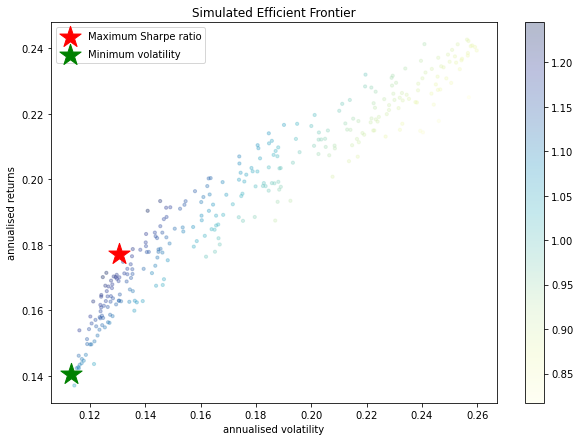

In [9]:
#sets up our dataframe to be used for the efficient frontier. Removes first row(as pct changes are na's for row 1)
df = prices.pct_change().iloc[1: , :]
df2 = df.replace([-np.inf,np.inf],np.nan)

#this removes infinite and na's. I want to include code here to remove tickers with mean return too high. 
#For instance one ticker has mean return 0.6 or so per day, this needs removed. 
df2 = df2.dropna()

returns = df2


#These are the inputs for our efficient frontier.

num_securities = len(returns.columns)
cov_matrix = returns.cov()
mean_returns = returns.mean()
num_portfolios = 300 # Simulate 30000 sets of weights
risk_free_rate = 0.015 # The 10-year treasury rate ==> current rate


disp = display_simulated_ef_with_random(returns,mean_returns, cov_matrix, num_portfolios, risk_free_rate)

# From HI's Code

almost all of this is from HI's returns code, the only thing I've changed is shortened the cross checking bit (i dont understand it but will add back in when I do) and then below where I extract the maximum sharpe portfolio allocation.


Ask: where does the "250,000" come from in the code?? Is this what we can see as the allocation? 

In [2]:
fx = pd.read_excel('Prices/FX.xlsx', sheet_name='data', skiprows=4, index_col=0)
portfolio = pd.read_excel('Prices/portfolio.xlsx')
price_df = pd.read_pickle('price_df.pkl')
mappings = pd.read_excel('mappings.xlsx', index_col=0)  

In [6]:
portfolio

,fsym_id,Side,Date,Exit Date,Country,Sector,Factor
0,F97WPW-R,Buy,2017-09-01 00:00:00,1/16/2017,Australia,Information_Technology,Momentum
1,CH4BGV-R,Buy,2017-09-01 00:00:00,1/17/2017,Australia,Consumer_Staples,Momentum
2,WT0KJR-R,Buy,2017-09-01 00:00:00,1/16/2017,Australia,Healthcare,Liq and Size
3,CW1DWQ-R,Sell Short,2017-09-01 00:00:00,1/16/2017,Australia,Healthcare,Liq and Size
4,VWMPF0-R,Sell Short,2017-09-01 00:00:00,1/16/2017,Australia,Healthcare,Liq and Size
...,...,...,...,...,...,...,...
2098,LPB1JD-R,Sell Short,2017-03-02 00:00:00,2/14/2017,Australia,All_sectors,Behavioural
2099,GW1MC2-R,Sell Short,2017-03-02 00:00:00,2/14/2017,Australia,All_sectors,Behavioural
2100,L9YDZG-R,Sell Short,2017-03-02 00:00:00,2/14/2017,Australia,All_sectors,Behavioural
2101,RGWXZX-R,Sell Short,2017-03-02 00:00:00,2017-09-02 00:00:00,Australia,Healthcare,Momentum


In [12]:
#max sharpe
disp[0]

max_sharpe = []

price_df = price_df.reset_index()

for i in disp[0].columns:
    max_sharpe.append(price_df[price_df['index'] == i])
max_sharpe2 = pd.concat(max_sharpe)



new_portfolio = []
for i in max_sharpe2['index']:
    new_portfolio.append(portfolio[portfolio.fsym_id == i])

In [13]:
new_portfolio2 = pd.concat(new_portfolio)

portfolio = new_portfolio2

### Preparing the Data

In [14]:
mappings = mappings.reset_index()
mappings = mappings[['fsym_id', 'currency']]

portfolio = portfolio[portfolio.Side.isin(['Buy', 'Sell Short'])]
portfolio = portfolio.merge(mappings, how='left')

portfolio['Average Cost'] = 0
portfolio['Qty'] = 0

#setting date-time to be correct format 
price_df = price_df.set_index('index')
price_df.columns = pd.to_datetime(price_df.columns).astype('str')
fx.index = pd.to_datetime(fx.index).astype('str')
portfolio.Date = pd.to_datetime(portfolio.Date).astype('str')
portfolio['Exit Date'] = pd.to_datetime(portfolio['Exit Date']).astype('str')

portfolio.drop_duplicates(['fsym_id', 'Date', 'Exit Date'], inplace=True)
exit_trades = []

### Setting up Average cost & Quantities

In [15]:
for i, row in portfolio.iterrows():
    ticker = row.fsym_id
    date = row.Date
    currency = row.currency
    price = price_df.loc[ticker, date]
    fx_rate = fx.loc[date, 'USD'+currency]
    portfolio.loc[i, 'Average Cost'] = price
    if row.Side == 'Buy':
        exit_side = 'Sell'
        entry_qty = 250000 * fx_rate // price
    else:
        exit_side = 'Buy Cover'
        entry_qty = -250000 * fx_rate // price
    portfolio.loc[i, 'Qty'] = entry_qty
    exit_price = price_df.loc[ticker, row['Exit Date']]
    exit_trades.append([ticker, exit_side, row['Exit Date'], None, row.Country, row.Sector, row.Factor, row.currency, exit_price, -entry_qty])

    
exit_trades_df = pd.DataFrame(exit_trades)
exit_trades_df.columns = portfolio.columns

##Adds on our newly calculated columns 
portfolio = pd.concat([portfolio, exit_trades_df])


portfolio.sort_values('Date', inplace=True)
portfolio.reset_index(drop=True, inplace=True)


### Setting up exit dates 

In [16]:
dates = pd.to_datetime(portfolio['Date'])

start_date = end_date = dates[0]

for date in dates:
    if date < start_date:
        start_date = date
    
    if date > end_date:
        end_date = date


start_date_str = start_date.strftime("%Y-%m-%d")
end_date_str = end_date.strftime("%Y-%m-%d")

price_df = price_df.reset_index().rename(columns={'index': 'fsym_id'}).merge(mappings, how='left', on='fsym_id').set_index('fsym_id')

price_df.reset_index(inplace=True)

portfolio['Date'] = pd.to_datetime(portfolio['Date'])
portfolio['Exit Date'] = pd.to_datetime(portfolio['Exit Date'])

### Setting up the final dataframe

In [17]:
trades = []
trade_dates = []
for row_idx, row in portfolio.iterrows():
    if row.Side in ['Sell', 'Buy Cover']:
        continue
    date = str(row['Date']).split(' ')[0]

    ticker = row['fsym_id']
    avg_cost = row['Average Cost']
    qty = row['Qty']
    currency = price_df[price_df.fsym_id == ticker].currency.values[0]

    exit_date = str(row['Exit Date']).split(' ')[0]

    if currency != 'USD':
        exit_conversion_rate = fx.loc[exit_date, f'USD{currency}']
    else:
        exit_conversion_rate = 1

    if row.Side == 'Buy':
        exit_row = portfolio[(portfolio.fsym_id == ticker) & (portfolio.Date == exit_date) & (portfolio.Side == 'Sell') & (portfolio.Qty == -row.Qty)]
    else:
        exit_row = portfolio[(portfolio.fsym_id == ticker) & (portfolio.Date == exit_date) & (portfolio.Side == 'Buy Cover') & (portfolio.Qty == -row.Qty)]
    

    exit_avg_cost = exit_row['Average Cost'].values[0]
    exit_qty = exit_row['Qty'].values[0]    
    
    prev_mv = (avg_cost * qty) / exit_conversion_rate
    trade_mv = (exit_avg_cost * exit_qty) / exit_conversion_rate

    trades.append([ticker, date, exit_date, qty, exit_qty, currency, avg_cost, exit_avg_cost, avg_cost / exit_conversion_rate, exit_avg_cost / exit_conversion_rate, prev_mv, trade_mv, (-1*trade_mv + -1*prev_mv)])


trade_dates.sort()

cross_check = pd.DataFrame(trades)
cross_check.columns = ['fsym_id', 'Entry Date', 'Exit Date', 'Position on Entry Date', 'Trade Position', 'Currency', 'Avg. Cost at Entry (Local ccy)', 'Avg. Cost at Exit (Local ccy)', 'Avg. Cost at Entry (USD)', 'Avg. Cost at Exit (USD)', 'MV at Entry (USD)', 'Trade MV (USD)', 'Returns']
average_pnl = cross_check.Returns.sum()


In [18]:
average_pnl

2603676.3575774883